# 队列的顺序存储（也就是用数组存储）

## ----队列的类型描述

In [ ]:
#define MaxSize = 50
typedef struct{
    ElemType data[MaxSize];
    int front,rear;
} SqQueue;

- 判空条件：Q.front == 0 && Q.rear == 0;
- 判满：不能用Q.rear == MaxSize,因为存在假溢出——后面循环队列有详细的判满方法

<hr/>
- 进队操作：先赋值，再指针自增
    - Q.data[Q.rear] == x;
    - Q.rear ++;
- 出队操作：先取头值，然后head++
    - x = Q.data[Q.front];
    - Q.front++;

## ----循环队列（依然基于线性表/循环是臆造的效果）



- **当Q.front == MaxSize-1时，再前进一位就到0，可以通过取余实现**

<hr/>

- 初始化：Q.front = 0;Q.rear = 0;
- 队首指针前进:Q.front = (Q.front + 1) % MaxSize;
    - 例如maxsize = 10
    - 例如：现在的front是3
        - 下一步，front = (3+1) % 10 = 4;
    - 例如现在的front是9
        - 下一步：front = (9+1) % 10 = 0
- 队尾指针前进：Q.rear = (Q.rear + 1) % MaxSize;
    - 原理与队首指针完全相同
- 队列长度：(Q.rear + MaxSize - Q.front) % MaxSize;
    - 例如现在对尾指针8，队首指针2
        - 长度 = （8+10-2）% 10 = 6(2,3,4,5,6,7存数据)
    - 例如现在尾2，队首8
        - 长度 = (2+10-8) % 10 = 4(8,9,0,1存数据)

<hr/>
#### 循环队列判断队满三种方法

- **牺牲一个元素**
    - 队首指针在队尾指针的下一个位置称为队满
    - (Q.rear + 1 + MaxSize) % MaxSize == 0,则队满

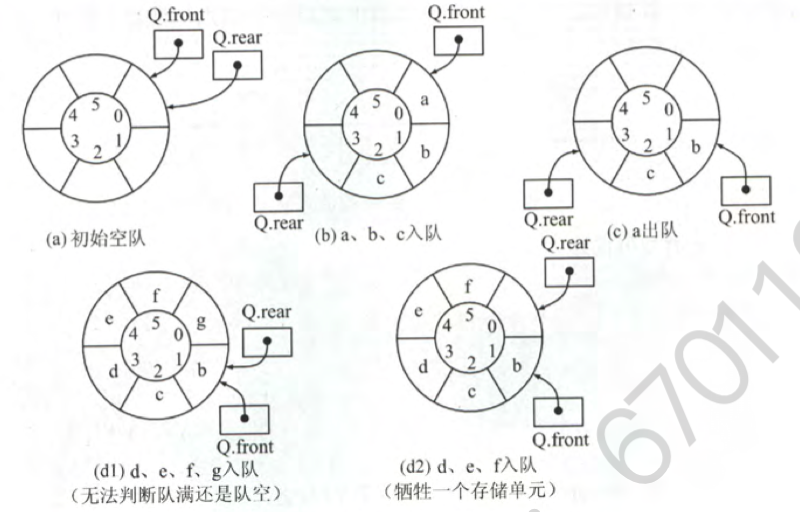

- **类型中增设一个Q.size，初始化为0**
    - Q.size == 0（空）
    - Q.size == MaxSize（满）



- **类型中增设tag**
    - tag == 0时，如果Q.front == Q.rear，就是删除导致，队空
    - tag == 1时，如果Q.front == Q.rear，就是插入导致，队满

## ----循环队列的操作

In [ ]:
//初始化
void InitQuene(&Q){
    Q.front = Q.rear = 0;
}

// 判空
void isEmpty(&Q){
    if(Q.front == Q.rear) return true;
    else return false;
}

// 判满
void isFull(&Q){
    if((Q.rear + 1) % MaxSize == Q.front){
        return true;
    }else{
        return false;
    }
}

//入队
void EnQuene(SqQuene &Q,ElemType x){
    // 首先判断是否满了
    if((Q.rear + 1)%MaxSize == Q.front) return false;
    Q.data[(Q.rear+1)%MaxSize] = x;
    Q.rear = (Q.rear+1)%MaxSize;
}

//出队
// 注意返回值用的是bool，这是因为要返回的是出队结果成功/失败
// 那么得传入一个x的引用地址，直接修改这个引用
bool DeQuene(SqQuene &Q,Elemtype &x){
    // 判空
    if(Q.rear == Q.front) return false;
    x = Q.data[Q.front];
    Q.front = (Q.front+1)%MaxSize;
    return true;
}

## ----队列的链式存储结构


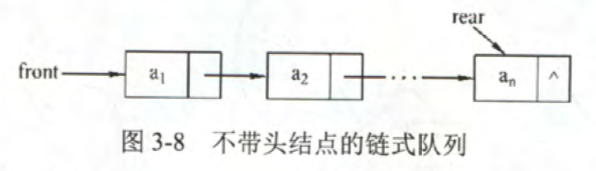

- 尾指针不同
    - 在顺序存储中，尾指针指向最后一个节点之后一个位置
    - 链式存储中，尾指针直接指向最后一个节点

#### 描述方法

In [ ]:
// 节点的定义
typedef struct{
    ElemType data;
    struct LinkNode *next;
} LinkNode;

// 队列的定义
typedef struct{
    //队首，队尾指针
    LinkNode *front,*rear;
} LinkQueue;

- 判空：Q.front == Q.rear == NULL;

<hr/>
- 出队：
    - 先判空
    - 取出头节点
    - free这个节点
    - Q.front指向下一个节点
    
<hr/>
- 入队：
    - 建立新节点
    - 新节点插入链表尾部
    - Q.rear指向这个新节点
    - 如果原队列为空，Q.front也指向这个节点

### 带头节点的队列


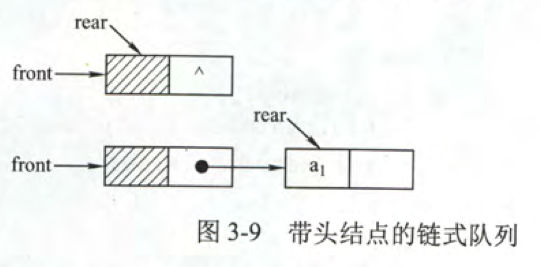

- 插入和删除操作可以统一
- 适合存储元素变化比较大的情形
- 不存在队满、溢出问题
- 程序中要使用多个队列，最好使用链式队列，就像多个栈的情形一样，不存在溢出问题

## ----链式队列的基本操作

In [ ]:
// 初始化
void InitQueue(LinkQueue &Q){
    // 建立和指向头节点
    Q.front = Q.rear = (LinkNode*)malloc(sizeof(LinkNode));
    // 初始为空
    Q.front.next = NULL;
}

// 判空
void isEmpty(LinkQueue &Q){
    if(Q.front == Q.rear) return true;
    else return false;
}

// 入队
void EnQuene(LinkQueue &Q,ElemType x){
    //建立新节点，赋值
    s = (LinkNode*)malloc(sizeof(LinkNode));
    s->data = x;
    s->next = NULL;
    
    //链接
    Q.rear->next = s;
    Q.rear = s;
}

// 出队
bool DeQuene(LinkQueue &Q,ElemType &x){
    //判空
    if(Q.rear == Q.front) return false;
    
    //取值
    s = Q.front->next;
    x = s.data;
    
    //链接，free
    Q.front->next = s->next;
    //如果只有一个节点，删除后变空
    if(Q.rear == s){
        Q.rear = Q.front;
    }
    
    //释放内存
    free(s);
    return true;
}

# ----双端队列

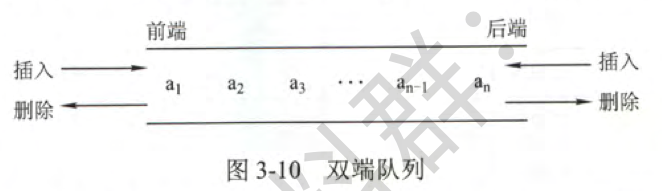

#### 现在只需记住
- 输入受限的双端队列：一端不能输入
- 输出受限的双端队列：一端不能输出